# Téléchargement de la base de données

In [1]:
# Pour récupérer le nombre de classes du training dataset
from tensorflow import keras
from tensorflow.keras import layers

/home/lucien/anaconda3/envs/tf/lib/python3.9/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
IMG_SIZE = 224
train_ds = keras.utils.image_dataset_from_directory(
    directory='/home/lucien/Documents/data_fish/Salmonidae_split/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=16,
    image_size=(IMG_SIZE, IMG_SIZE))

Found 3000 files belonging to 12 classes.


In [3]:
class_names = train_ds.class_names
print(class_names)

['Grand_Corégone', 'Ombre_Commun', 'Saumon_Atlantique', 'Saumon_Chinook', 'Saumon_Coho', 'Saumon_Kéta', 'Saumon_Rose', 'Saumon_Rouge', 'Touladi', 'Truite_Arc-En-Ciel', 'Truite_Commune_Européenne', 'Truite_Fardée']


In [4]:
nb_classes = len(class_names)
print(nb_classes)

12


# Chargement du modèle

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow as tf

In [6]:
# Création de l'architecture du modèle à utiser

conv_base = keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling=None,
    classes=nb_classes,
)

model = keras.Sequential(
    [
        conv_base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(nb_classes, kernel_regularizer=regularizers.L2(1e-4), activation='softmax')
    ]
)

# Chargement des poids
model.load_weights('/home/lucien/Documents/final_project_Essec/salmon_ai/model_poisson/model')#mettre ici le même chemin que celui des callbacks (dans la var model_checkpoints)

model.compile(optimizers.SGD(learning_rate=1e-3, momentum=0.9), loss='categorical_crossentropy', metrics=['categorical_accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Chargement de l'ensemble de test

In [7]:
# Récupération du dataset de test
test_ds = keras.utils.image_dataset_from_directory(
    directory='/home/lucien/Documents/data_fish/Salmonidae_split/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=16,
    image_size=(IMG_SIZE, IMG_SIZE))

Found 385 files belonging to 12 classes.


In [8]:
test_ds_no_shuffle = keras.utils.image_dataset_from_directory(
    directory='/home/lucien/Documents/data_fish/Salmonidae_split/test/',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    batch_size=16,
    image_size=(IMG_SIZE, IMG_SIZE))

Found 385 files belonging to 12 classes.


In [9]:
import numpy as np
import os

taille_test = 0
for folder in os.listdir("/home/lucien/Documents/data_fish/Salmonidae_split/test/"):
  taille_test += len(os.listdir("/home/lucien/Documents/data_fish/Salmonidae_split/test/" + folder))
print(taille_test)
x_test = np.zeros((taille_test, IMG_SIZE, IMG_SIZE, 3))
y_test = np.zeros((taille_test, nb_classes))

ind_data = 0
for bx, by in test_ds_no_shuffle.as_numpy_iterator():
  x_test[ind_data:ind_data+bx.shape[0]] = bx
  y_test[ind_data:ind_data+bx.shape[0]] = by

  ind_data += bx.shape[0]

x_test = tf.keras.applications.resnet.preprocess_input(x_test)

385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/lucien/Documents/data_fish/Salmonidae_split/test/Grand_Corégone/29.jpeg


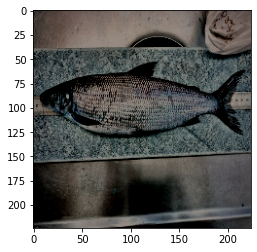

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image

plt.imshow(x_test[0].astype(int))
print(test_ds_no_shuffle.file_paths[0])

# Analyse des résultats : précision, sensibilité, F1_score

In [11]:
y_pred = model.predict(x_test)

13/13 [==============================] - 4s 96ms/step


In [12]:
import tensorflow
from tensorflow.keras.metrics import Accuracy

In [13]:
test_accuracy = Accuracy()

prediction = tensorflow.argmax(y_pred, axis=1, output_type=tensorflow.int32)
print(prediction)
test_accuracy(prediction, np.argmax(y_test, axis=1))

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

tf.Tensor(
[ 0  0  0  3  0  0  1  4  1  1  1  1  3  6  1  1 11  1  1  8  1  1 11  1
  3  1 11  1  1  1  1  2  2  3  2  2  4 11 11  2 10 10  3  2  6  1  2  3
  2  3  2  2 10  4  2  2  1  2  2  3  2  8  2  2  4  2  2 10  2  3  6  3
  3  3  3  3  3  3  3  3  2  3  5  4  5  3  5  3  3  3  3  3  3  3  4  3
  3  3  6  8  2  5  7  4  3  3  3  3 11  4  4  5  2  4  4  2  3  4  3  7
  5  4  4  5  4  7  3  7  4  5  3  3  4  3  4  4  3  3  4  3  6  6  7  3
  4  4  2  3  5  5  3  5  3 11  5  5  5  5  3  5  5  6  5  5  5  5  3  1
 10  2  7  5  5  2  5  3  5  2  4  4  5  3  3  5  7  5  6  6  6  3  4  6
  5  5  3  6  6  2  6  3  6  8  6  5  5  7  6  6  3  3  3  9  6  6  6  8
  4  2  6  6  5  5  6  7 11  3  7  3  3  7  3  3  9  4  7  7  7  7 11  2
  4  4 11  5  7  7  7  7  4  1  6  7  7 11  7  7  7  7  7  4  7  7  7  7
  8  4  1  7  8  8  8  7  8  8  7  8  8  8  8  8  8  8  8  8  8  8  0  8
  8  8  8  5  8 10  8  8  9  3  7  9  6  9  9  8 11  5  3 10  5  4 10 10
  2  1 10 11 10 10 10  7  5 10 10  3  7 

In [14]:
test_topk_accuracy = tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top_k_categorical_accuracy", dtype=None)

test_topk_accuracy(y_test, y_pred)
print("Test set top 2 accuracy: {:.3%}".format(test_topk_accuracy.result()))

Test set top 2 accuracy: 77.922%


## Précision et Sensibilité

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_pred, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=class_names, digits=5, output_dict=True)
print(report)

{'Grand_Corégone': {'precision': 0.8333333333333334, 'recall': 0.625, 'f1-score': 0.7142857142857143, 'support': 8}, 'Ombre_Commun': {'precision': 0.625, 'recall': 0.6818181818181818, 'f1-score': 0.6521739130434783, 'support': 22}, 'Saumon_Atlantique': {'precision': 0.5263157894736842, 'recall': 0.5128205128205128, 'f1-score': 0.5194805194805194, 'support': 39}, 'Saumon_Chinook': {'precision': 0.37681159420289856, 'recall': 0.6666666666666666, 'f1-score': 0.4814814814814815, 'support': 39}, 'Saumon_Coho': {'precision': 0.42857142857142855, 'recall': 0.38461538461538464, 'f1-score': 0.4054054054054054, 'support': 39}, 'Saumon_Kéta': {'precision': 0.5, 'recall': 0.5128205128205128, 'f1-score': 0.5063291139240506, 'support': 39}, 'Saumon_Rose': {'precision': 0.5862068965517241, 'recall': 0.4358974358974359, 'f1-score': 0.5, 'support': 39}, 'Saumon_Rouge': {'precision': 0.5675675675675675, 'recall': 0.5384615384615384, 'f1-score': 0.5526315789473685, 'support': 39}, 'Touladi': {'precision'

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(report).transpose()
display(df)
cm = confusion_matrix(true_labels, predicted_labels)

precision    recall  f1-score     support
Grand_Corégone              0.833333  0.625000  0.714286    8.000000
Ombre_Commun                0.625000  0.681818  0.652174   22.000000
Saumon_Atlantique           0.526316  0.512821  0.519481   39.000000
Saumon_Chinook              0.376812  0.666667  0.481481   39.000000
Saumon_Coho                 0.428571  0.384615  0.405405   39.000000
Saumon_Kéta                 0.500000  0.512821  0.506329   39.000000
Saumon_Rose                 0.586207  0.435897  0.500000   39.000000
Saumon_Rouge                0.567568  0.538462  0.552632   39.000000
Touladi                     0.727273  0.750000  0.738462   32.000000
Truite_Arc-En-Ciel          0.444444  0.363636  0.400000   11.000000
Truite_Commune_Européenne   0.655172  0.487179  0.558824   39.000000
Truite_Fardée               0.583333  0.538462  0.560000   39.000000
accuracy                    0.537662  0.537662  0.537662    0.537662
macro avg                   0.571169  0.541448  0.549089  385.000000
weighted avg                0.554061  0.537662  0.538636  385.000000

In [19]:
# Proportion de classes dont le f1_score est inférieur au f1_score moyen parmi 
# les classes dont le support est inférieur à un seui
df_without_average = df.head(nb_classes)
display(df_without_average)

averages = df.tail(3)
display(averages)

seuil = 15
selection = df_without_average.loc[df_without_average['support'] <= seuil]
display(selection)

nb_classes_under_represented = len(selection)

bad_f1_score = selection.loc[selection['f1-score'] <= averages.at['macro avg', 'f1-score']]
display(bad_f1_score)

nb_classes_bad_f1_score = len(bad_f1_score)
proportion = (nb_classes_bad_f1_score / nb_classes_under_represented) * 100
print("------- Proportion de : " + str(proportion) + " % -------")

precision    recall  f1-score  support
Grand_Corégone              0.833333  0.625000  0.714286      8.0
Ombre_Commun                0.625000  0.681818  0.652174     22.0
Saumon_Atlantique           0.526316  0.512821  0.519481     39.0
Saumon_Chinook              0.376812  0.666667  0.481481     39.0
Saumon_Coho                 0.428571  0.384615  0.405405     39.0
Saumon_Kéta                 0.500000  0.512821  0.506329     39.0
Saumon_Rose                 0.586207  0.435897  0.500000     39.0
Saumon_Rouge                0.567568  0.538462  0.552632     39.0
Touladi                     0.727273  0.750000  0.738462     32.0
Truite_Arc-En-Ciel          0.444444  0.363636  0.400000     11.0
Truite_Commune_Européenne   0.655172  0.487179  0.558824     39.0
Truite_Fardée               0.583333  0.538462  0.560000     39.0

precision    recall  f1-score     support
accuracy       0.537662  0.537662  0.537662    0.537662
macro avg      0.571169  0.541448  0.549089  385.000000
weighted avg   0.554061  0.537662  0.538636  385.000000

precision    recall  f1-score  support
Grand_Corégone       0.833333  0.625000  0.714286      8.0
Truite_Arc-En-Ciel   0.444444  0.363636  0.400000     11.0

precision    recall  f1-score  support
Truite_Arc-En-Ciel   0.444444  0.363636       0.4     11.0

------- Proportion de : 50.0 % -------


# Analyse des confusions entre les classes

In [20]:
# fp et fn : on a une classe à prédire et on détecte une autre classe
# => la classe à prédire = fn et l'autre classe comptée en fp
# précision => proportion de bonne détection
# sensibilité => mesure de combien on en a manqué
def confused_class(class_num, confusion_matrix, threshold=0):
  """
  Obtenir la liste des classes avec laquelle on a confondu la classe indiquee
  par class_num (numero de la classe).

  Arguments :
  - class_num : le numero de la classe
  - confusion_matrix : la matrice de confusion

  Retourne :
  false_positives : un dictionnaire contenant les faux positifs
  """

  class_name = class_names[class_num]

  indices_fp = np.argwhere(confusion_matrix[class_num,:] >= threshold)
  indices_fp = indices_fp.flatten()

  #indices_fn = np.argwhere(confusion_matrix[:,class_num] >= threshold)
  #indices_fn = indices_fn.flatten()

  false_positives = {}
  for i in indices_fp:
    if i != class_num:
      false_positives[class_names[i]] = confusion_matrix[class_num, i]


  #false_negatives = {}
  #for i in indices_fn:
  #  if i != class_num:
  #    false_negatives[class_names[i]] = confusion_matrix[i,class_num]  

  return false_positives

In [21]:
def find_relevant_confusion(threshold, confusion_matrix):
  """
  Obtenir les classes avec lesquelles on a confondu l'entree du reseau.

  Arguments :
  - threshold : le nombre minimum de confusion avec une classe
  - confusion_matrix : la matrice de confusion des donnees

  Retourne :
  - dic_fp : un dictionnaire contenant : la classe "verite terrain" en clef, et
  en valeur, un dictionnaire contenant les classes avec lesquelles on a confondu
  la verite terrain (clef) et la nombre d'erreurs (valeur)
  """

  dic_fp = {}

  for i in range(nb_classes):
    fp = confused_class(i, confusion_matrix, threshold=threshold)
    if (len(fp) > 0):
      dic_fp[class_names[i]] = fp
    #if (len(fn) > 0):
    #  dic_fn[class_names[i]] = fn
  return dic_fp

In [22]:
fp = confused_class(8, cm, 1) #on rentre le numéro de la classe
print(fp)

{'Grand_Corégone': 1, 'Ombre_Commun': 1, 'Saumon_Coho': 1, 'Saumon_Kéta': 1, 'Saumon_Rouge': 3, 'Truite_Commune_Européenne': 1}


In [23]:
import pprint
import pandas as pd
dic_fp = find_relevant_confusion(3, cm)#pour lesquels on a eu au moins 3 erreurs avec la même classe
pprint.pprint(dic_fp, width=1)

dataframe = pd.DataFrame.from_dict(dic_fp)

{'Ombre_Commun': {'Truite_Fardée': 3},
 'Saumon_Atlantique': {'Ombre_Commun': 3,
                       'Saumon_Chinook': 5,
                       'Saumon_Coho': 3,
                       'Truite_Commune_Européenne': 4},
 'Saumon_Chinook': {'Saumon_Coho': 3,
                    'Saumon_Kéta': 4},
 'Saumon_Coho': {'Saumon_Atlantique': 3,
                 'Saumon_Chinook': 10,
                 'Saumon_Kéta': 4,
                 'Saumon_Rouge': 4},
 'Saumon_Kéta': {'Saumon_Atlantique': 3,
                 'Saumon_Chinook': 8},
 'Saumon_Rose': {'Saumon_Chinook': 6,
                 'Saumon_Kéta': 6},
 'Saumon_Rouge': {'Saumon_Chinook': 5,
                  'Saumon_Coho': 5,
                  'Truite_Fardée': 3},
 'Touladi': {'Saumon_Rouge': 3},
 'Truite_Commune_Européenne': {'Saumon_Atlantique': 4,
                               'Saumon_Chinook': 3,
                               'Saumon_Coho': 3,
                               'Saumon_Rouge': 3,
                               'Truite_Far

# Affichage d'images mal classées

In [24]:
def get_misclassified_images(class_name, file_paths, y, y_pred):
  """
  Obtenir un dictionnaire des images mal classees ainsi que le label de la 
  classe avec laquelle on a fait la confusion.

  Arguments :
  - class_name : le nom de la classe souhaitée
  - x : les images d'entrees
  - y : les labels attendus
  - y_pred : les labels predits

  Retourne :
  - dic : un dictionnaire contenant en valeur le chemin de l'image mal classee
  et le label associe
  """

  num_class = class_names.index(class_name)
  index = np.where(y == num_class)

  dic = {}
  for i in index[0]:
    if (y_pred[i] != y[i]):
      dic[file_paths[i]] = class_names[y_pred[i]]
  
  return dic

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img
def print_misclassified_images(dic, class_name, bad_label):
  """
  Permet d'afficher au plus 9 images mal classees dont le label est
  bad_label.

  Arguments :
  - dic : un dictionnaire contenant en clef les chemins d'acces aux images mal
  classees et en valeur, le mauvais label associe
  """

  fig = plt.figure(figsize=(20, 20))
  keys = list(dic.keys())
  print
  rows = 3
  columns = 3

  j = 1
  for i in range(len(keys)):
    image_path = keys[i]
    if (dic[image_path] != bad_label):
      fig.add_subplot(rows, columns, j)
      image = img.imread(image_path)
      plt.imshow(image)
      plt.axis('off') 
      plt.title("Attendu : " + class_name + " / Prédit : " + dic[image_path])
      j += 1
    if j == 9:
      break;

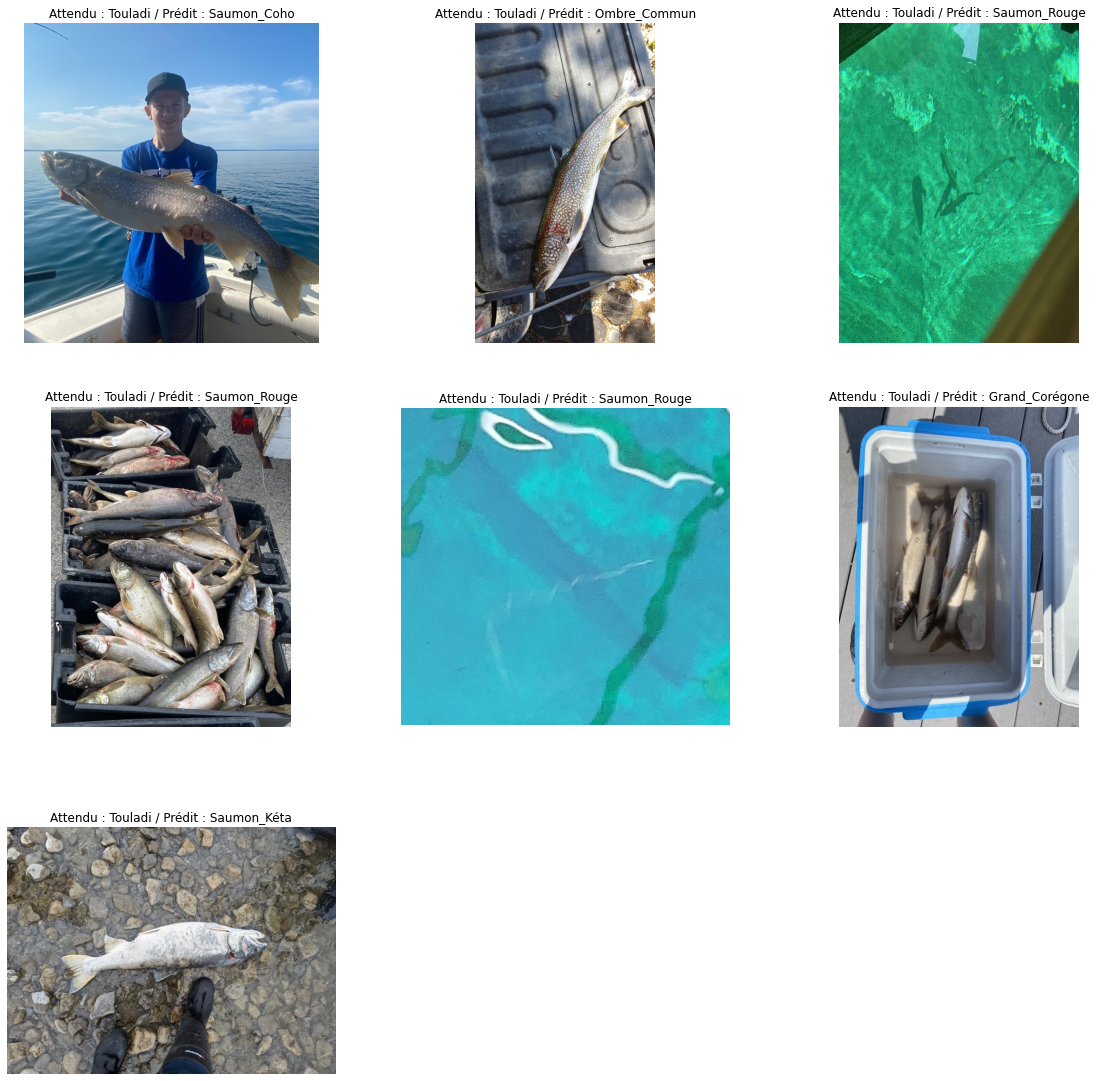

In [26]:
true_y = np.argmax(y_test, axis=1)
predicted_y = np.argmax(y_pred, axis=1)
file_paths = test_ds_no_shuffle.file_paths
class_name = "Touladi"
mauvais_label = "Truite_Commune_Européenne"

dic = get_misclassified_images(class_name, file_paths, true_y, predicted_y)
#pprint.pprint(dic, width=1)
print_misclassified_images(dic, class_name, mauvais_label)

# Affichage d'heatmaps d'images mal classées - Méthode Grad-CAM

## Définition des fonctions pour les heatmaps



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 12)                24588     
                                                                 
Total params: 23,612,300
Trainable params: 23,559,180
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
last_conv_layer_name = "resnet50"


In [30]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer("global_average_pooling2d").input, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [31]:
from scipy import ndimage, misc
import cv2
def save_and_display_gradcam(img_path, heatmap, cam_path="/home/lucien/Documents/final_project_Essec/cam_path/27.jpeg", alpha=0.4, seuil_heatmap=0, affichage_contour=True, affichage_heatmap=False):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    #on veut resize l'image pour qu'elle soit de taille 224x224
    img = cv2.resize(img, (224, 224))
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.where(heatmap > seuil_heatmap, heatmap, 0)
    # print("heatmap")
    # print(heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    #print("jeat_heatmap")
    # print(jet_heatmap)

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = np.copy(img) #on part de l'image initial
    red = np.zeros((IMG_SIZE, IMG_SIZE))
    for i in range(IMG_SIZE):
      for j in range(IMG_SIZE):
        # Partie la plus chaude de la heatmap
        if (not(affichage_heatmap)):
          if (jet_heatmap[i][j][0] > seuil_heatmap):
            superimposed_img[i][j] = jet_heatmap[i][j] * alpha + img[i][j]
            red[i][j] = 1
        else:
          superimposed_img[i][j] = jet_heatmap[i][j] * alpha + img[i][j]
          red[i][j] = 1
    
    # Affichage uniquement du contour
    if (affichage_contour):
      contour = np.copy(img)
      for i in range(1, IMG_SIZE-1):
        for j in range(1, IMG_SIZE-1):
          if (red[i][j] == 1):
            sub_red = red[i-1:i+2, j-1:j+2]
            nb_ones = np.sum(sub_red)
            if (nb_ones <= 6):
              contour[i][j] = superimposed_img[i][j]
      superimposed_img = contour

    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    
    # Save the superimposed image
    superimposed_img.save(cam_path)

    #Display Grad CAM
    #display(Image(cam_path))
    return superimposed_img

#save_and_display_gradcam(img_path, heatmap)

## Affichage des heatmaps sur des images mal classées

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

def print_misclassified_images_heatmaps(dic, class_name, bad_label, alpha=1.2, seuil_heatmap=0, affichage_contour=True, affichage_heatmap=False):
  """
  Permet d'afficher au plus 9 heatmaps d'images mal classees dont le label est
  bad_label.

  Arguments :
  - dic : un dictionnaire contenant en clef les chemins d'acces aux images mal
  classees et en valeur, le mauvais label associe
  """

  fig = plt.figure(figsize=(20, 20))
  keys = list(dic.keys())
  rows = 3
  columns = 3

  j = 1
  for i in range(len(keys)):
    image_path = keys[i]
    if (dic[image_path] != bad_label):
      fig.add_subplot(rows, columns, j)

      image_array = tf.keras.applications.resnet.preprocess_input(get_img_array(image_path, size=(IMG_SIZE,IMG_SIZE)))
      # print("shape array : ", image_array.shape)
      # #on veut afficher d'où à où vont les valeurs des coefficient de iamge_array
      # print("min : ", np.min(image_array))
      # print("max : ", np.max(image_array))
      heatmap = make_gradcam_heatmap(image_array, model, last_conv_layer_name)
      superimposed_img = save_and_display_gradcam(image_path, heatmap, alpha=alpha, seuil_heatmap=seuil_heatmap, affichage_contour=affichage_contour, affichage_heatmap=affichage_heatmap)
      
      plt.imshow(superimposed_img)
      plt.axis('off') 
      plt.title("Attendu : " + class_name + " / Prédit : " + dic[image_path])
      plt.show()
      j += 1
    if j == 9:
      break;

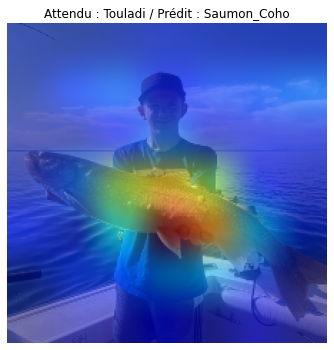

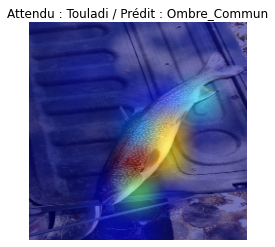

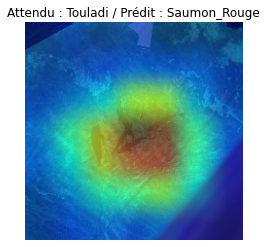

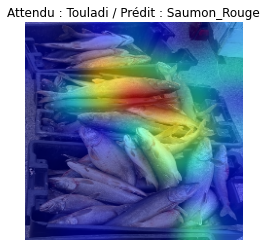

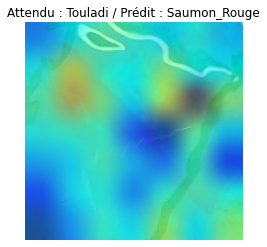

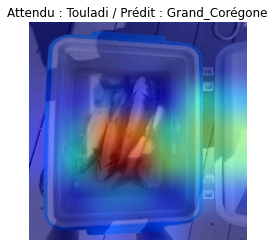

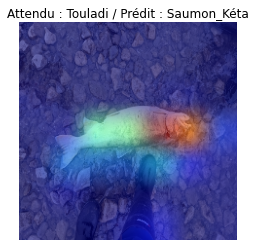

In [33]:
# Remove last layer's softmax
model.layers[-1].activation = None

class_name = "Touladi"
mauvais_label = "Truite_Commune_Européenne"
dic = get_misclassified_images(class_name, file_paths, true_y, predicted_y)
#pprint.pprint(dic, width=1)

print_misclassified_images_heatmaps(dic, class_name, mauvais_label, seuil_heatmap=0, affichage_contour=False, affichage_heatmap=True)

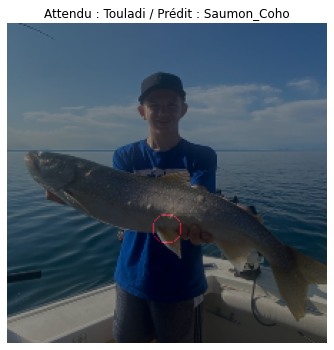

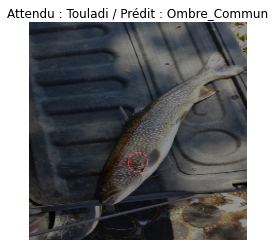

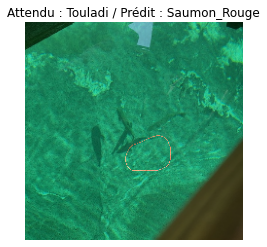

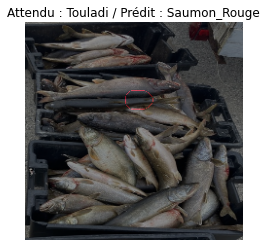

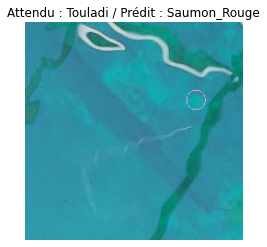

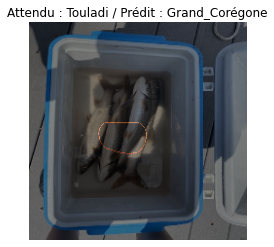

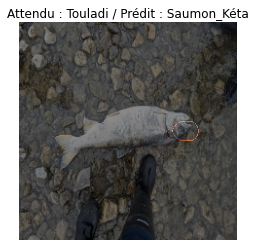

In [34]:
class_name = "Touladi"
mauvais_label = "Truite_Commune_Européenne"
dic = get_misclassified_images(class_name, file_paths, true_y, predicted_y)
#pprint.pprint(dic, width=1)

print_misclassified_images_heatmaps(dic, class_name, mauvais_label, seuil_heatmap=200, affichage_contour=True, affichage_heatmap=False)

# Affichage des heatmaps sur des images bien classées

In [35]:
def get_classified_images(class_name, file_paths, y, y_pred):
  num_class = class_names.index(class_name)
  index = np.where(y == num_class)

  dic = {}
  for i in index[0]:
    if (y_pred[i] == y[i]):
      dic[file_paths[i]] = class_names[y_pred[i]]
  
  return dic

In [36]:
class_name = "Touladi"
dic_Touladi= get_classified_images(class_name, file_paths, true_y, predicted_y)
print(dic_Touladi)

{'/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/107.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/153.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/175.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/178.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/193.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/212.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/240.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/242.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/243.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/252.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/test/Touladi/26.jpeg': 'Touladi', '/home/lucien/Documents/data_fish/Salmonidae_split/tes

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

def print_wellclassified_images_heatmaps(dic, class_name, bad_label, alpha=1.2, seuil_heatmap=0, affichage_contour=True, affichage_heatmap=False):
  """
  Permet d'afficher au plus 9 heatmaps d'images mal classees dont le label est
  bad_label.

  Arguments :
  - dic : un dictionnaire contenant en clef les chemins d'acces aux images mal
  classees et en valeur, le mauvais label associe
  """

  fig = plt.figure(figsize=(20, 20))
  keys = list(dic.keys())
  rows = 3
  columns = 3

  j = 1
  for i in range(len(keys)):
    image_path = keys[i]
    if (dic[image_path] == bad_label):
      fig.add_subplot(rows, columns, j)

      image_array = tf.keras.applications.resnet.preprocess_input(get_img_array(image_path, size=(IMG_SIZE,IMG_SIZE)))
      # print("shape array : ", image_array.shape)
      # #on veut afficher d'où à où vont les valeurs des coefficient de iamge_array
      # print("min : ", np.min(image_array))
      # print("max : ", np.max(image_array))
      heatmap = make_gradcam_heatmap(image_array, model, last_conv_layer_name)
      superimposed_img = save_and_display_gradcam(image_path, heatmap, alpha=alpha, seuil_heatmap=seuil_heatmap, affichage_contour=affichage_contour, affichage_heatmap=affichage_heatmap)
      
      plt.imshow(superimposed_img)
      plt.axis('off') 
      plt.title("Attendu : " + class_name + " / Prédit : " + dic[image_path])
      plt.show()
      j += 1
    if j == 9:
      break;

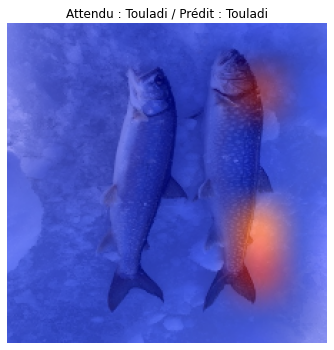

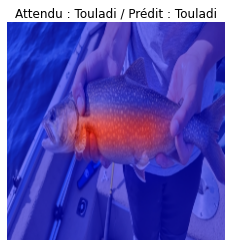

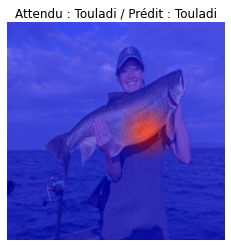

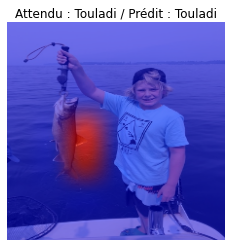

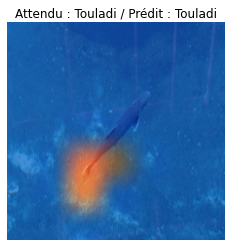

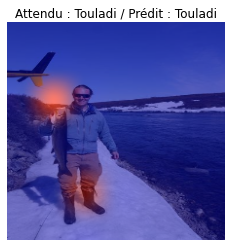

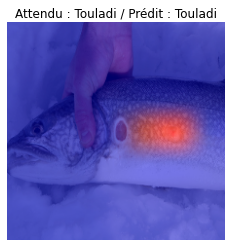

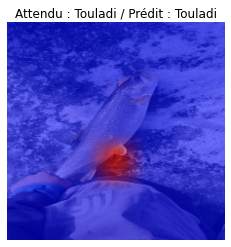

In [38]:
print_wellclassified_images_heatmaps(dic_Touladi, class_name, class_name, seuil_heatmap=200, affichage_contour=False, affichage_heatmap=True)

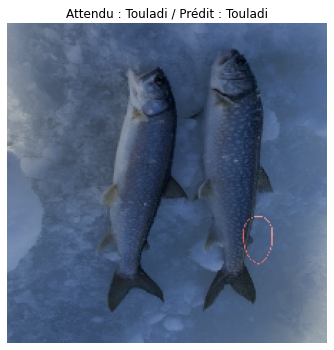

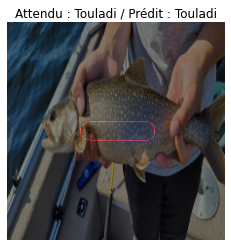

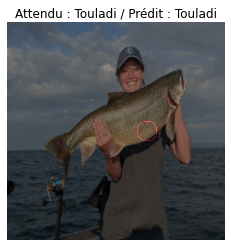

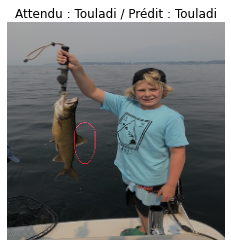

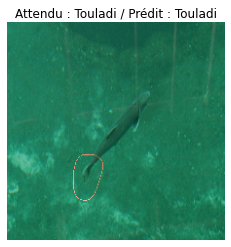

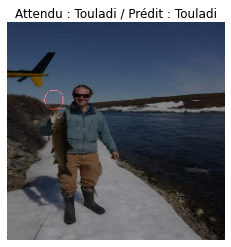

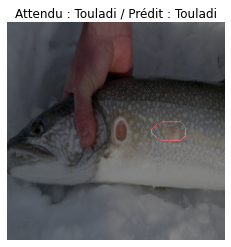

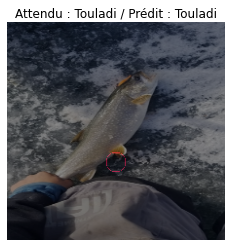

In [39]:
print_wellclassified_images_heatmaps(dic_Touladi, class_name, class_name, seuil_heatmap=200, affichage_contour=True, affichage_heatmap=False)